In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#닥스훈트 
dach_length = [75, 77, 83, 81, 73, 99, 72, 83]
dach_height = [24, 29, 19, 32, 21, 22, 19, 34]

#사모예드
samo_length = [76, 78, 82, 88, 76, 83, 81, 89]
samo_height = [55, 58, 53, 54, 61, 52, 57, 64]

#말티즈
mal_length = [35, 39, 38, 41, 30, 57, 41, 35]
mal_height = [23, 26, 19, 30, 21, 24, 28, 20]

d_data = np.column_stack((dach_length, dach_height))
s_data = np.column_stack((samo_length, samo_height))
m_data = np.column_stack((mal_length, mal_height))                                  

In [27]:
d_data_df = pd.DataFrame(d_data)
d_label = np.zeros(len(d_data))

s_data_df = pd.DataFrame(s_data)
s_label = np.ones(len(s_data))

m_data_df = pd.DataFrame(m_data)
m_label = np.full(len(m_data),2) #array를 특정 수로 채워 생성

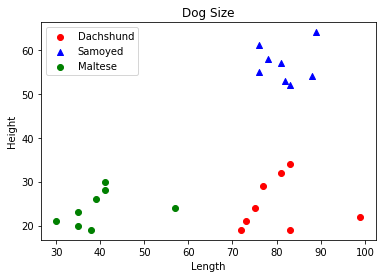

In [28]:
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height, c='blue', marker='^', label='Samoyed')
plt.scatter(mal_length, mal_height, c='green', label='Maltese')
plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog Size')
plt.legend(loc='upper left')
plt.show()


In [29]:
print('닥스훈트(0) : ', d_data.tolist())
print('사모예드(1) : ', s_data.tolist())
print('말티즈(2) : ', m_data.tolist())

닥스훈트(0) :  [[75, 24], [77, 29], [83, 19], [81, 32], [73, 21], [99, 22], [72, 19], [83, 34]]
사모예드(1) :  [[76, 55], [78, 58], [82, 53], [88, 54], [76, 61], [83, 52], [81, 57], [89, 64]]
말티즈(2) :  [[35, 23], [39, 26], [38, 19], [41, 30], [30, 21], [57, 24], [41, 28], [35, 20]]


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

dogs = np.concatenate((d_data, s_data, m_data))
labels = np.concatenate((d_label, s_label, m_label))

dog_classes = {0:'Dachshund', 1:'Samoyed', 2:'maltese'}
dog_classes[0]

'Dachshund'

In [31]:
def classification(k,data) :  
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(dogs, labels)
  y_pred_all = knn.predict(data)
  return y_pred_all

In [32]:
y_pred_all = classification(3, dogs)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels, y_pred_all)

array([[8, 0, 0],
       [0, 8, 0],
       [1, 0, 7]])

In [34]:
A = [[58, 30]]
B = [[80, 26]]
C = [[80, 41]]
D = [[75, 55]]
A[0]

[58, 30]

In [35]:
sA = classification(7, A)
sA

array([0.])

In [36]:
print('A 데이터 분류결과\nA ',A,' : n_neighbors가 3 일때 : ',dog_classes[classification(3, A)[0]],'\nA',A,' : n_neighbors가 5 일때 : ',dog_classes[classification(5, A)[0]],'\nA',A,' : n_neighbors가 7 일때 : ',dog_classes[classification(7, A)[0]])
print('B 데이터 분류결과\nB ',B,' : n_neighbors가 3 일때 : ',dog_classes[classification(3, B)[0]],'\nB',B,' : n_neighbors가 5 일때 : ',dog_classes[classification(5, B)[0]],'\nB',B,' : n_neighbors가 7 일때 : ',dog_classes[classification(7, B)[0]])
print('C 데이터 분류결과\nC ',C,' : n_neighbors가 3 일때 : ',dog_classes[classification(3, C)[0]],'\nC',C,' : n_neighbors가 5 일때 : ',dog_classes[classification(5, C)[0]],'\nC',C,' : n_neighbors가 7 일때 : ',dog_classes[classification(7, C)[0]])
print('D 데이터 분류결과\nD ',D,' : n_neighbors가 3 일때 : ',dog_classes[classification(3, D)[0]],'\nD',D,' : n_neighbors가 5 일때 : ',dog_classes[classification(5, D)[0]],'\nD',D,' : n_neighbors가 7 일때 : ',dog_classes[classification(7, D)[0]])


A 데이터 분류결과
A  [[58, 30]]  : n_neighbors가 3 일때 :  maltese 
A [[58, 30]]  : n_neighbors가 5 일때 :  maltese 
A [[58, 30]]  : n_neighbors가 7 일때 :  Dachshund
B 데이터 분류결과
B  [[80, 26]]  : n_neighbors가 3 일때 :  Dachshund 
B [[80, 26]]  : n_neighbors가 5 일때 :  Dachshund 
B [[80, 26]]  : n_neighbors가 7 일때 :  Dachshund
C 데이터 분류결과
C  [[80, 41]]  : n_neighbors가 3 일때 :  Dachshund 
C [[80, 41]]  : n_neighbors가 5 일때 :  Dachshund 
C [[80, 41]]  : n_neighbors가 7 일때 :  Samoyed
D 데이터 분류결과
D  [[75, 55]]  : n_neighbors가 3 일때 :  Samoyed 
D [[75, 55]]  : n_neighbors가 5 일때 :  Samoyed 
D [[75, 55]]  : n_neighbors가 7 일때 :  Samoyed


In [37]:
#5.4 위 결과로 보아 위의 데이터 중에서 k값에 영향을 받지 않는 데이터는 무엇이며 그 이유는 무엇일지 서술해보자
#사모예드가 영향을 받지 않는다, 그 이유는 사모예드의 데이터값이 다른 데이터값보다 더 밀집되어있기때문인가..? to be continue

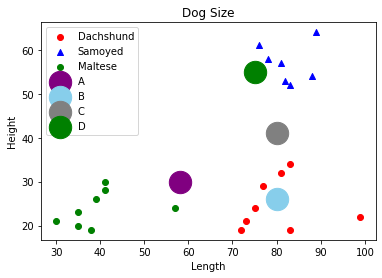

In [38]:
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height, c='blue', marker='^', label='Samoyed')
plt.scatter(mal_length, mal_height, c='green', label='Maltese')
plt.scatter(A[0][0],A[0][1], c='purple', s=500, marker='o', label='A')
plt.scatter(B[0][0],B[0][1], c='skyblue', s=500, marker='o', label='B')
plt.scatter(C[0][0],C[0][1], c='grey', s=500, marker='o', label='C')
plt.scatter(D[0][0],D[0][1], c='green', s=500, marker='o', label='D')
plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog Size')
plt.legend(loc='upper left')
plt.show()

In [40]:
dogs_sum = np.concatenate((dogs,A,B,C,D))
dogs_sum

array([[75, 24],
       [77, 29],
       [83, 19],
       [81, 32],
       [73, 21],
       [99, 22],
       [72, 19],
       [83, 34],
       [76, 55],
       [78, 58],
       [82, 53],
       [88, 54],
       [76, 61],
       [83, 52],
       [81, 57],
       [89, 64],
       [35, 23],
       [39, 26],
       [38, 19],
       [41, 30],
       [30, 21],
       [57, 24],
       [41, 28],
       [35, 20],
       [58, 30],
       [80, 26],
       [80, 41],
       [75, 55]])

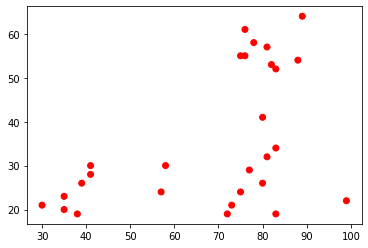

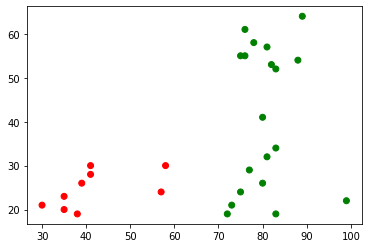

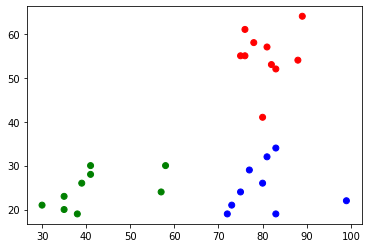

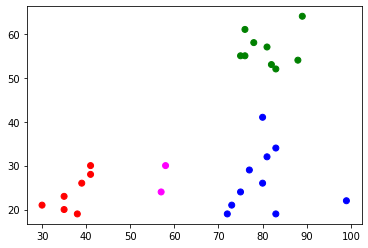

In [62]:
from sklearn import cluster

def  kmeans_predict_plot(x,k):
  model = cluster.KMeans(n_clusters=k)
  model.fit(x)
  labels = model.predict(x)
  colors = np.array(['red','green','blue','magenta'])
  plt.scatter(x[:,0],x[:,1], color = colors[labels])

kmeans_predict_plot(dogs_sum, k=1)
plt.show()
kmeans_predict_plot(dogs_sum, k=2)
plt.show()
kmeans_predict_plot(dogs_sum, k=3)
plt.show()
kmeans_predict_plot(dogs_sum, k=4)
plt.show()

#추후 subplot을 이용해서 시각화를 예쁘게 해야지,,